# Custom Layers in Keras

# Task 1: Importing Libraries

In [3]:
import tensorflow as tf
import utils
import matplotlib.pyplot as plt
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.1.0


# Task 2: Import and Visualize Dataset

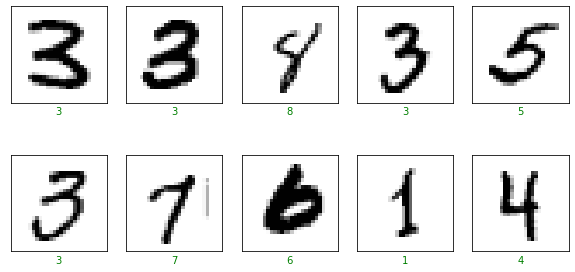

In [6]:
(x_train, y_train), (x_test, y_test) = utils.load_data()
utils.plot_random_examples(x_train, y_train).show() 

# Task 3: Creating a Custom Layer

In [12]:
class ParametricRelu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ParametricRelu, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.alpha = self.add_weight(
            name='alpha', shape=(1,),
            initializer='zeros',
            trainable=True
        )
        super(ParametricRelu, self). build(input_shape)
        
    def call(self, x):
        return tf.maximum(0., x) + self.alpha*tf.minimum(0., x)

# Task 4: Creating the Model

In [14]:
def create_model(use_prelu=True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape=(784,)))
    if use_prelu:
        model.add(ParametricRelu())
    else:
        model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
parametric_relu_3 (Parametri (None, 64)                1         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


# Task 5: Model Training

In [16]:
print('Initial alpha:', model.layers[1].get_weights())

h = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 5
)

Initial alpha: [array([0.], dtype=float32)]
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2962 - accuracy: 0.9170 - val_loss: 0.1617 - val_accuracy: 0.9525
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1268 - accuracy: 0.9626 - val_loss: 0.1147 - val_accuracy: 0.9661
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0887 - accuracy: 0.9739 - val_loss: 0.0996 - val_accuracy: 0.9706
Epoch 4/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0703 - accuracy: 0.9784 - val_loss: 0.0902 - val_accuracy: 0.9735
Epoch 5/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0556 - accuracy: 0.9833 - val_loss: 0.0942 - val_accuracy: 0.9723


In [17]:
print('Final Alpha:', model.layers[1].get_weights())

Final Alpha: [array([-0.84572405], dtype=float32)]


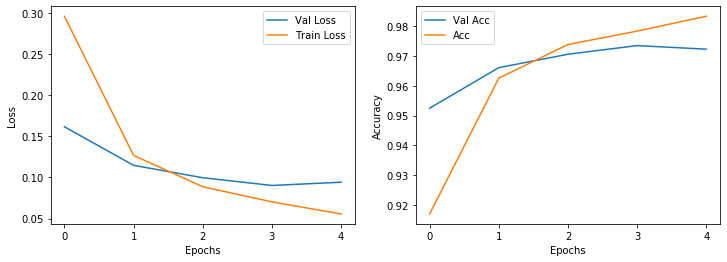

In [19]:
utils.plot_results(h).show()

# Task 6: Comparison with ReLU

In [20]:
model = create_model(use_prelu=False)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [21]:
h = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 5
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3047 - accuracy: 0.9138 - val_loss: 0.1731 - val_accuracy: 0.9501
Epoch 2/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1446 - accuracy: 0.9576 - val_loss: 0.1245 - val_accuracy: 0.9626
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1015 - accuracy: 0.9696 - val_loss: 0.1067 - val_accuracy: 0.9690
Epoch 4/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0796 - accuracy: 0.9765 - val_loss: 0.0939 - val_accuracy: 0.9729
Epoch 5/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0643 - accuracy: 0.9803 - val_loss: 0.0918 - val_accuracy: 0.9745


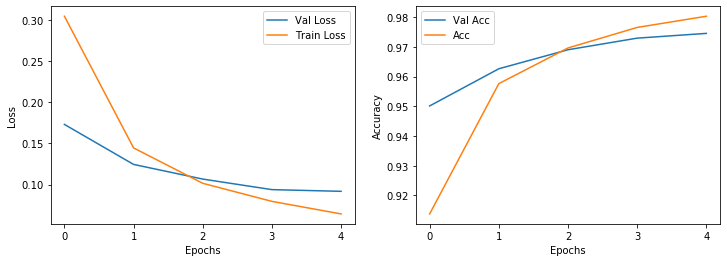

In [22]:
utils.plot_results(h).show()